# Sprint 13 (Pronósticos y predicciones)
# Proyecto 13 - Gimnasios "Model Fitness"

1. INTRODUCCIÓN 

La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.

Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado.

En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Tu tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

Tienes que:

- Aprender a predecir la probabilidad de pérdida (para el próximo mes) para cada cliente.
- Elaborar retratos de usuarios típicos: selecciona los grupos más destacados y describe sus características principales.
- Analizar los factores que más impactan la pérdida.
- Sacar conclusiones básicas y elaborar recomendaciones para mejorar la atención al cliente: identificar a los grupos objetivo; sugerir medidas para reducir la rotación; describir cualquier otro patrón que observes con respecto a la interacción con los clientes.

2. DESCRIPCIÓN DE LOS DATOS

Model Fitness te aportó archivos CSV que contienen los datos sobre la cancelación de un mes en concreto e información del mes que lo precedía. 

   */datasets/gym_churn_us.csv*

El dataset incluye los siguientes campos:

- 'Churn' — la cancelación para el mes en cuestión

- Campos de dataset actuales:

    - Datos del usuario del mes anterior
    
        - 'gender'.
  
        - 'Near_Location' — si el/la usuario/a vive o trabaja en el vecindario donde se encuentra el gimnasio.
  
        - 'Partner' — si el/la usuario/a trabaja en una compañía asociada (el gimnasio tiene  empresas asociadas cuyos empleados obtienen descuentos; en esos casos el gimnasio almacena información sobre los empleadores de los clientes).
  
        - Promo_friends — si el/la usuario/a originalmente se inscribió mediante una oferta “trae a un/a amigo/a” (se utilizó el código promocional de un/a amigo/a cuando pagaron el primer abono).
  
        - 'Phone' — si el/la usuario/a aportó el número de teléfono.
  
        - 'Age'.
  
        - 'Lifetime' — el tiempo (en meses) desde que el/la usuario/a llegó por primera vez al gimnasio.
     
    - Datos del registro de visitas y compras y datos sobre el estado actual de la membresía:
 
        - 'Contract_period' — 1 mes, 3 meses, 6 meses o 1 año.
  
        - 'Month_to_end_contract' — los meses que faltan hasta que expire el contrato.
  
        - 'Group_visits' — si el/la usuario/a participa en sesiones grupales.
  
        - 'Avg_class_frequency_total' — frecuencia media de visitas por semana a lo largo de la vida del cliente.
  
        - 'Avg_class_frequency_current_month' — frecuencia media de visitas por semana durante el mes en curso.
  
        - 'Avg_additional_charges_total' — cantidad total de dinero gastado en otros servicios del gimnasio: cafetería, productos deportivos, cosméticos, masajes, etc.

3. INICIALIZACIÓN 

In [1]:
# Se cargan todas las librerias necesarias 
# Librerias básicas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
import datetime as dt
import math as mth

# Estadística
from statsmodels.stats.proportion import proportions_ztest

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster import KMeans

# Evaluación de modelos
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
# Se cargan los archivos de datos en DataFrame
churn_df = pd.read_csv('/datasets/gym_churn_us.csv', sep=',')

In [3]:
# Se imprime la información general y resumida sobre los datos de cancelación 
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
# Se imprime una muestra de los datos de cancelación 
churn_df.head(15)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


3.1 PRPARACIÓN DE LOS DATOS

In [5]:
# Confirmamos los tipos de datos del dataframe 
print(churn_df.dtypes)

gender                                 int64
Near_Location                          int64
Partner                                int64
Promo_friends                          int64
Phone                                  int64
Contract_period                        int64
Group_visits                           int64
Age                                    int64
Avg_additional_charges_total         float64
Month_to_end_contract                float64
Lifetime                               int64
Avg_class_frequency_total            float64
Avg_class_frequency_current_month    float64
Churn                                  int64
dtype: object


In [6]:
# Renombramos los nombres de las columnas 
churn_df.columns = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'churn']
print(churn_df.columns)

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')


In [7]:
# Verificamos si existen datos duplicados
duplicates = churn_df.duplicated().sum()
print(f"Filas duplicadas: {duplicates}")

Filas duplicadas: 0


In [8]:
# Verificamos si existen valores ausentes en el dataframe 
print("\nValores nulos por columna:")
print(churn_df.isna().sum())


Valores nulos por columna:
gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64


Como parte final del preprocesamiento de los datos debemos verificar la codificación de variables categóricas

Tenemos que normalizar o escalar las variables numéricas continuas

In [9]:
# Se definen las columnas numéricas que conviene escalar
numeric_features = [
    'age',
    'avg_additional_charges_total',
    'month_to_end_contract',
    'lifetime',
    'avg_class_frequency_total',
    'avg_class_frequency_current_month'
]

# Creamos el escalador
scaler = StandardScaler()

# Aplicamos la transformación a las columnas numéricas
churn_df[numeric_features] = scaler.fit_transform(churn_df[numeric_features])

churn_df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,-0.056554,-1.377531,0.161605,-0.193329,-1.911920,-1.678472,0
1,0,1,0,0,1,12,1,0.557327,-0.350213,1.831941,0.873680,0.045176,0.136014,0
2,0,1,1,0,1,1,0,-0.363494,-0.181592,-0.792873,-0.460081,-0.020493,-0.029019,0
3,0,1,1,1,1,12,1,1.171208,-0.874722,1.831941,-0.460081,1.364655,1.510450,0
4,1,1,1,1,1,1,0,-0.977375,0.533700,-0.792873,-0.193329,-0.787076,-0.614542,0


In [10]:
# Separamos los datos predictivos y la variable objetivo
X = churn_df.drop('churn', axis=1)
y = churn_df['churn']

In [11]:
# Dividimos datos de entrenamiento y prueba 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

La opción stratify=y asegura que la proporción de clientes con y sin churn se mantenga igual en ambos conjuntos.

Distribución de Churn:
0    0.73475
1    0.26525
Name: churn, dtype: float64


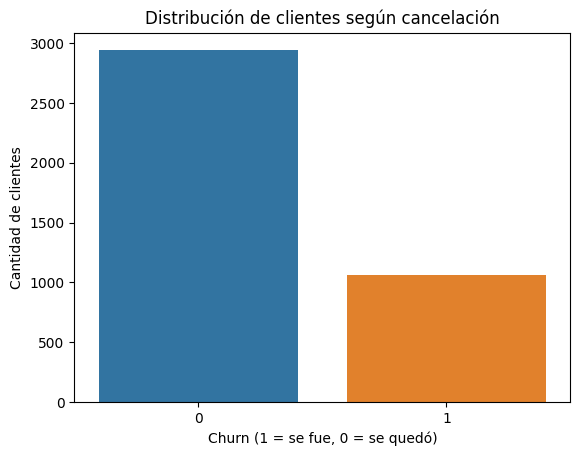

In [12]:
# Distribución del churn
churn_distribution = churn_df['churn'].value_counts(normalize=True)
print("Distribución de Churn:")
print(churn_distribution)

sns.countplot(x='churn', data=churn_df)
plt.title('Distribución de clientes según cancelación')
plt.xlabel('Churn (1 = se fue, 0 = se quedó)')
plt.ylabel('Cantidad de clientes')
plt.show()

Interpretación:
- El 73.5 % de los clientes no se dieron de baja (churn = 0),
- El 26.5 % sí cancelaron su membresía (churn = 1).

3.2 ANÁLISIS EXPLORATORIO DE LOS DATOS (EDA)

In [13]:
# Estadísticas descriptivas
display(churn_df.describe())

# Comprobamos nuevamente valores nulos
print("\nValores nulos por columna:")
print(churn_df.isna().sum())

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,4.014566e-16,-5.329071e-17,-8.881784e-18,2.842171e-17,-8.881784e-18,7.105427e-17,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-3.432900e+00,-1.523667e+00,-7.928727e-01,-9.935851e-01,-1.932903e+00,-1.678472e+00,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-6.704349e-01,-8.103801e-01,-7.928727e-01,-7.268329e-01,-7.181647e-01,-7.637430e-01,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.655380e-02,-1.113055e-01,-7.928727e-01,-1.933286e-01,-4.757761e-02,-4.509753e-02,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,5.573273e-01,6.643506e-01,4.002244e-01,3.401757e-01,6.759005e-01,7.060246e-01,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,3.626733e+00,4.210422e+00,1.831941e+00,7.275732e+00,4.263501e+00,4.160181e+00,1.000000



Valores nulos por columna:
gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64


In [14]:
# Valores promedio por grupo de churn
churn_group_means = churn_df.groupby('churn').mean(numeric_only=True)
display(churn_group_means)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,0.243181,0.119385,0.229156,0.263300,0.150039,0.247755
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,-0.673617,-0.330700,-0.634768,-0.729347,-0.415611,-0.686288


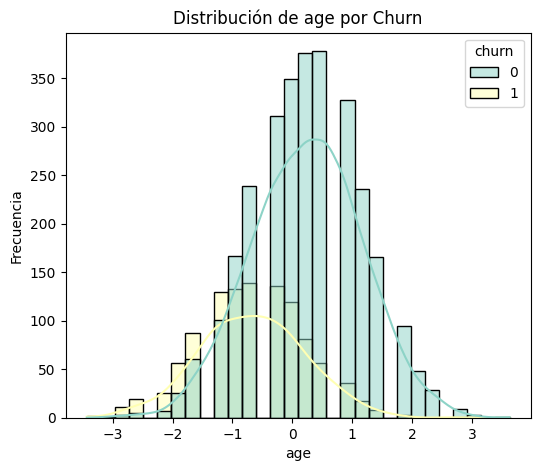

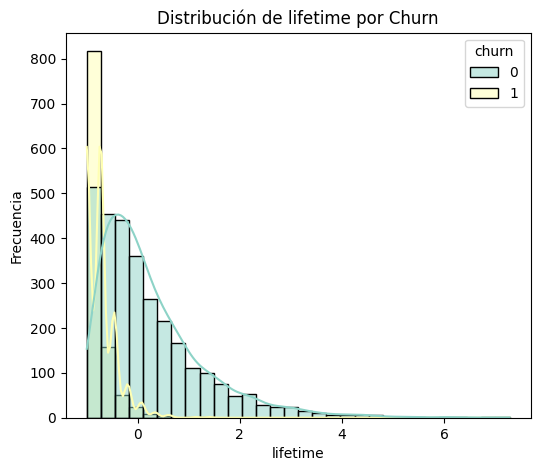

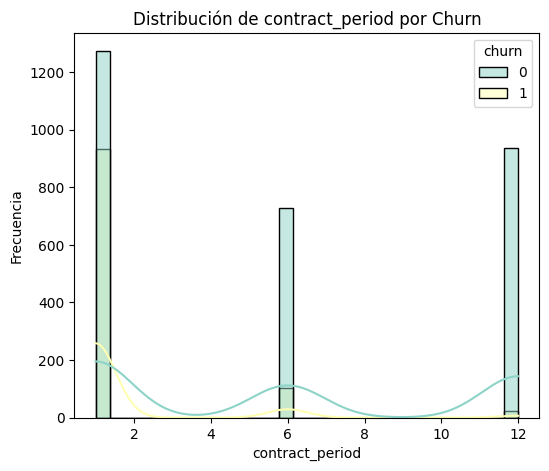

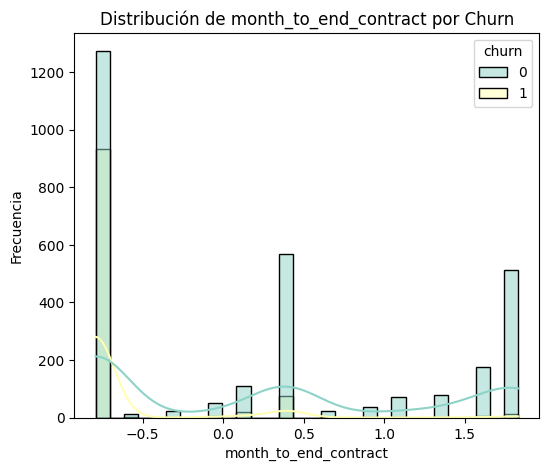

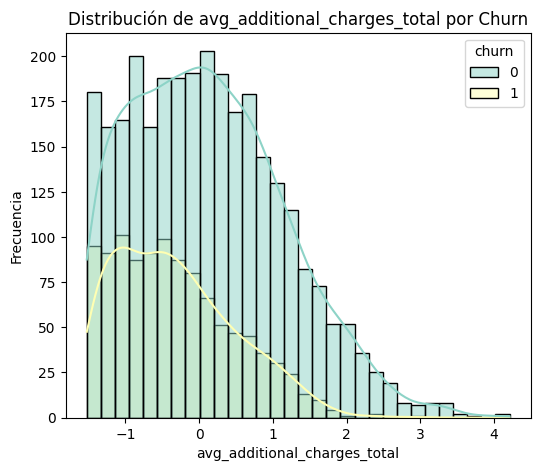

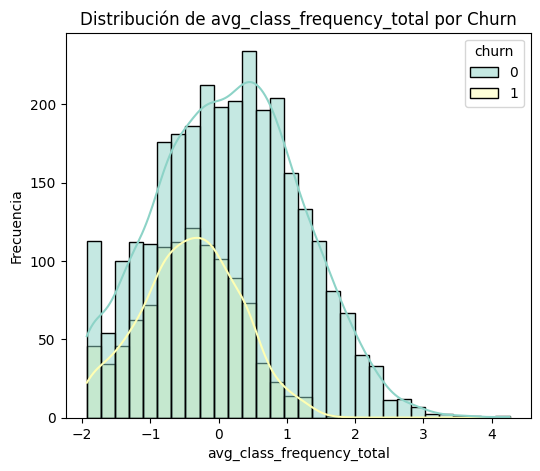

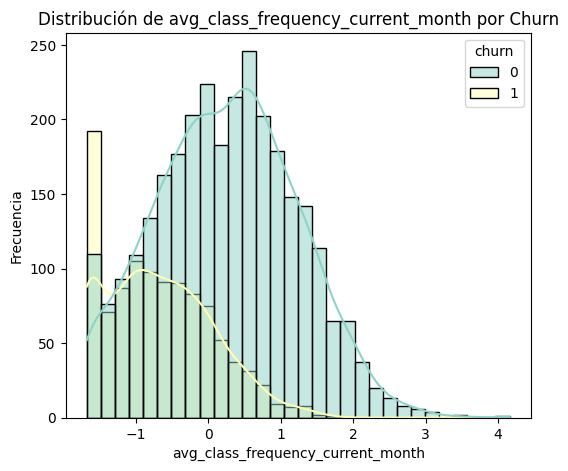

In [15]:
# Lista de columnas numéricas que queremos comparar
numeric_cols = [
    'age', 'lifetime', 'contract_period',
    'month_to_end_contract', 'avg_additional_charges_total',
    'avg_class_frequency_total', 'avg_class_frequency_current_month'
]

# Graficamos distribuciones comparando clientes activos vs cancelados
for col in numeric_cols:
    plt.figure(figsize=(6,5))
    sns.histplot(data=churn_df, x=col, hue='churn', kde=True, palette='Set3', bins=30)
    plt.title(f'Distribución de {col} por Churn')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

In [16]:
# Tabla de la matriz de correlación
corr_matrix = churn_df.corr()
display(corr_matrix)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


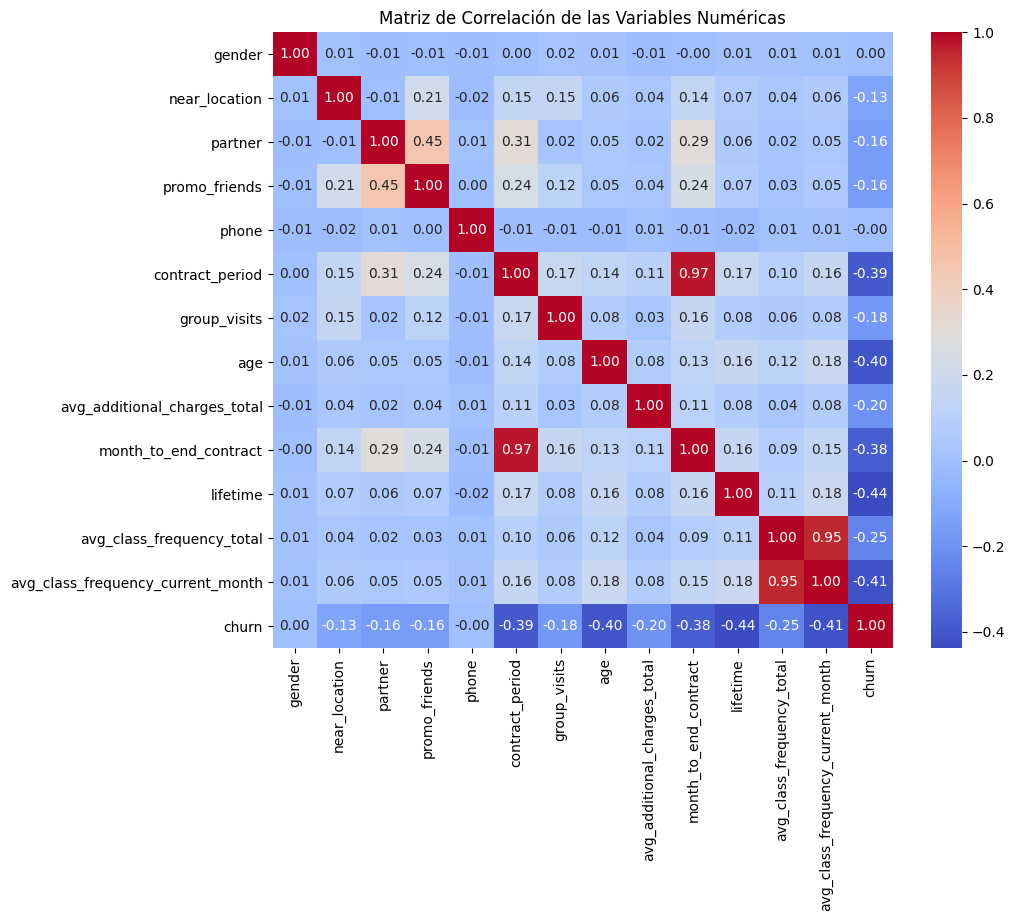

In [17]:
# Matriz de correlación
corr_matrix = churn_df.corr()  # sin numeric_only

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación de las Variables Numéricas')
plt.show()

churn                                1.000000
gender                               0.000708
phone                               -0.001177
near_location                       -0.128098
partner                             -0.157986
promo_friends                       -0.162233
group_visits                        -0.175325
avg_additional_charges_total        -0.198697
avg_class_frequency_total           -0.249715
month_to_end_contract               -0.381393
contract_period                     -0.389984
age                                 -0.404735
avg_class_frequency_current_month   -0.412348
lifetime                            -0.438220
Name: churn, dtype: float64


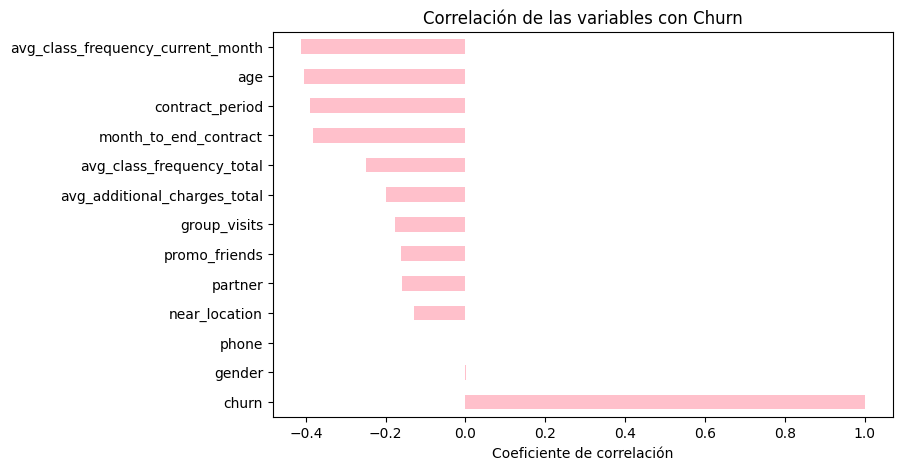

In [18]:
target_corr = corr_matrix['churn'].sort_values(ascending=False)
print(target_corr)

plt.figure(figsize=(8,5))
target_corr[:-1].plot(kind='barh', color='pink')
plt.title('Correlación de las variables con Churn')
plt.xlabel('Coeficiente de correlación')
plt.show()

Análisis de correlaciones con la tasa de cancelación

Las correlaciones más significativas son negativas, lo que indica que ciertos factores reducen el riesgo de cancelación. 
En otras palabras, a mayor valor de estas variables, menor probabilidad de que el cliente cancele su membresía:

lifetime (-0.44) → Los clientes con mayor tiempo de permanencia en el gimnasio muestran una menor probabilidad de cancelar.

avg_class_frequency_current_month (-0.40) → Una alta frecuencia de asistencia en el mes actual se asocia con mayor continuidad en la membresía.

age (-0.40) → Los clientes de mayor edad tienden a mantenerse activos. Esto podría deberse a una mayor estabilidad económica o disponibilidad de tiempo, aunque esta hipótesis no puede confirmarse con la información actual.

contract_period (-0.39) → Los contratos más largos (anuales) están relacionados con menores tasas de cancelación.

month_to_end_contract (-0.38) → Los clientes con meses restantes en su contrato son menos propensos a cancelar.

avg_class_frequency_total (-0.25) → Una mayor frecuencia total de asistencia a lo largo del tiempo se vincula con una menor probabilidad de abandono.

avg_additional_charges_total (-0.20) → Los clientes que consumen servicios adicionales dentro del gimnasio tienden a mostrar mayor compromiso y retención.

group_visits (-0.18) → La participación en clases grupales también se asocia con una mayor fidelidad al gimnasio.

Factores con influencia limitada o nula

gender, phone → Muestran una correlación cercana a cero, por lo que no influyen significativamente en la cancelación (al ser datos personales, no se espera relación directa).

near_location (0.13) → Vivir cerca del gimnasio contribuye ligeramente a la retención, aunque el efecto es bajo.

partner, promo_friends → Los clientes que acuden acompañados o participan en promociones con amigos presentan una leve mejora en la retención. Aunque el efecto no es fuerte, podría explorarse el diseño de nuevas promociones basadas en este hallazgo.

4. MODELO PARA PREDECIR LA CANCELACIÓN DE USUARIES 

Para dividir los datos en entrenamiento y validación primero separamos las características (X) y la variable objetivo (y), y luego dividimos en entrenamiento y validación.

In [19]:
# Variables predictoras y objetivo
X = churn_df.drop('churn', axis=1)
y = churn_df['churn']

# División del conjunto de datos
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [20]:
# Modelo 1: Regresión logística
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

# Modelo 2: Bosque aleatorio
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# Predicciones
y_pred_log = log_model.predict(X_valid)
y_pred_rf = rf_model.predict(X_valid)

# Evaluamos la regresión logística
acc_log = accuracy_score(y_valid, y_pred_log)
prec_log = precision_score(y_valid, y_pred_log)
rec_log = recall_score(y_valid, y_pred_log)

# Evaluamos el bosque aleatorio
acc_rf = accuracy_score(y_valid, y_pred_rf)
prec_rf = precision_score(y_valid, y_pred_rf)
rec_rf = recall_score(y_valid, y_pred_rf)

print("* Regresión Logística *")
print(f"Exactitud: {acc_log:.3f}")
print(f"Precisión: {prec_log:.3f}")
print(f"Recall: {rec_log:.3f}\n")

print("* Bosque Aleatorio *")
print(f"Exactitud: {acc_rf:.3f}")
print(f"Precisión: {prec_rf:.3f}")
print(f"Recall: {rec_rf:.3f}")

* Regresión Logística *
Exactitud: 0.925
Precisión: 0.880
Recall: 0.830

* Bosque Aleatorio *
Exactitud: 0.927
Precisión: 0.885
Recall: 0.835


Observaciones: 

- Ambos modelos tienen un rendimiento alto (más del 92% de exactitud), lo que nos puede indicar que los datos son bastante predictivos.
- El Bosque Aleatorio es ligeramente superior en precisión y recall, por lo que es nuestra mejor opción para predecir la cancelación de clientes.
- La diferencia es muy pequeña, por lo que si necesitamos entender que factores influyen más la regresión logística puede seguir siendo útil como modelo explicativo. 

5. CREAR CLÚSTERES DE USUARIES

In [22]:
# Dejamos de lado la columna 'churn'
X_cluster = churn_df.drop('churn', axis=1)

# Estandarizamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

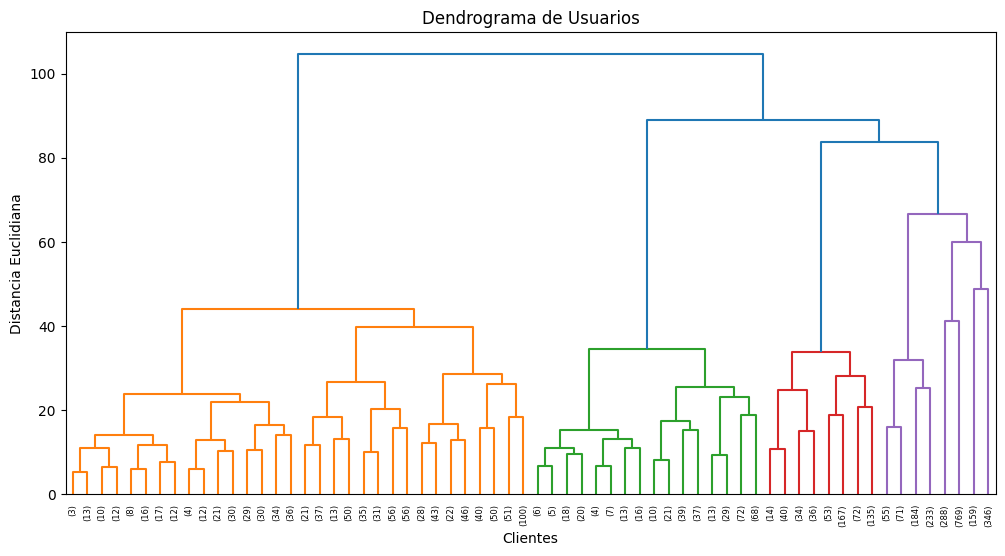

In [23]:
# Creamos la matriz de distancias
Z = linkage(X_scaled, method='ward')  # método 'ward' minimiza la varianza dentro de clústeres

# Graficamos dendrograma
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=5)  # p=5 limita la visualización a los 5 niveles superiores
plt.title('Dendrograma de Usuarios')
plt.xlabel('Clientes')
plt.ylabel('Distancia Euclidiana')
plt.show()

In [24]:
# Entrenamos modelo K-means
# Definimos K-means con 5 clústeres
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Agregamos los clústeres al dataframe original
churn_df['cluster'] = cluster_labels

In [25]:
# Valores medios de las características por clúster
cluster_means = churn_df.groupby('cluster').mean()
display(cluster_means)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.502370,0.949447,0.829384,0.998420,1.0,3.097946,0.448657,-0.024551,-0.053656,-0.342398,0.012741,-0.111595,-0.092584,0.246445
1,0.554556,0.849269,0.263217,0.052868,1.0,2.606299,0.436445,0.253149,0.133175,-0.454135,0.281664,0.891333,0.917691,0.089989
2,0.499422,0.937572,0.737572,0.478613,1.0,11.854335,0.546821,0.221290,0.171948,1.548632,0.254137,0.131038,0.219542,0.021965
3,0.485738,0.718011,0.299919,0.018745,1.0,1.914425,0.276284,-0.337728,-0.181095,-0.596843,-0.407904,-0.672577,-0.759028,0.572942
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,0.034892,-0.028394,0.034259,0.057529,-0.025521,-0.040925,0.266839


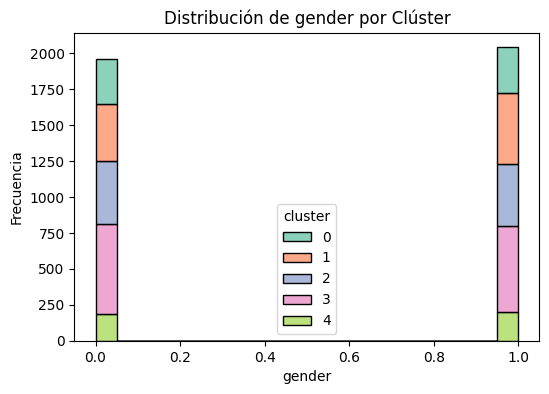

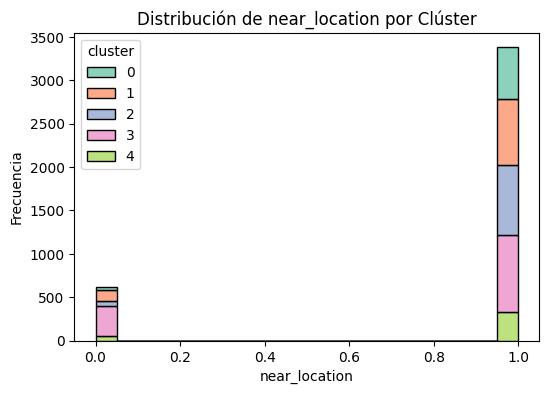

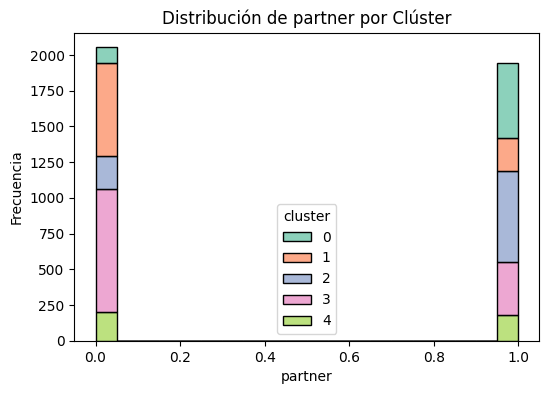

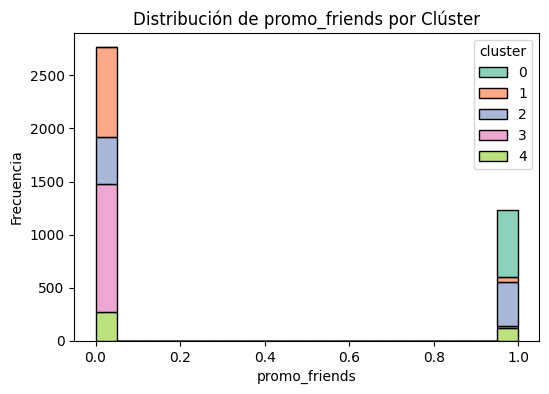

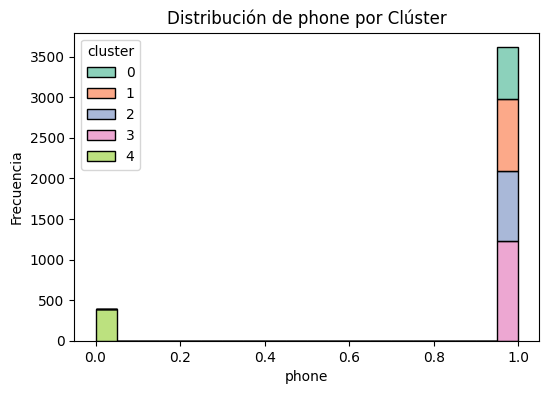

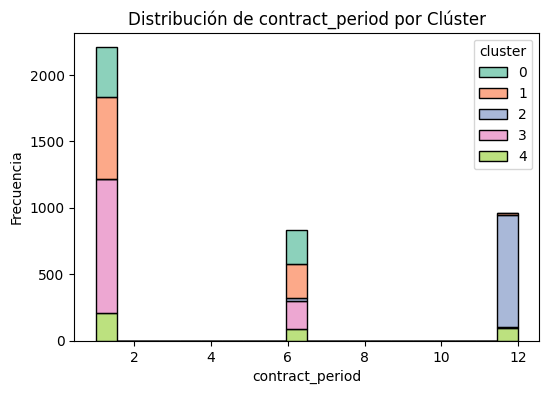

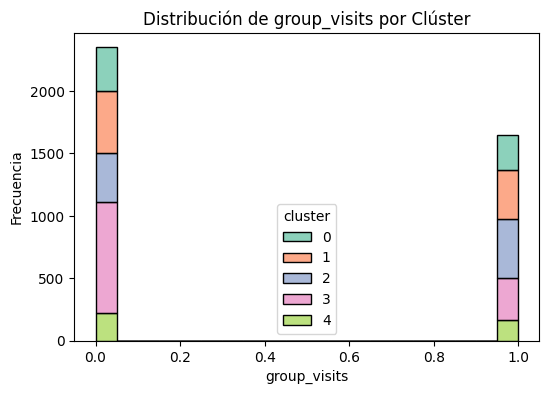

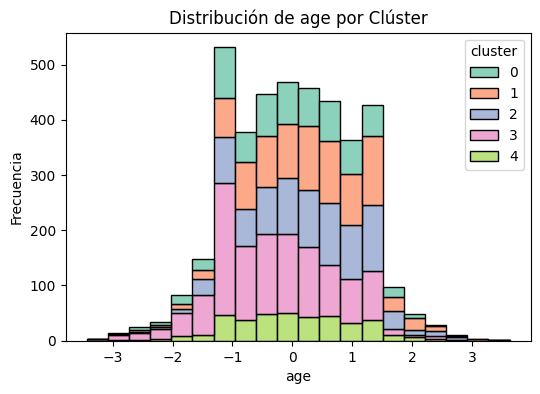

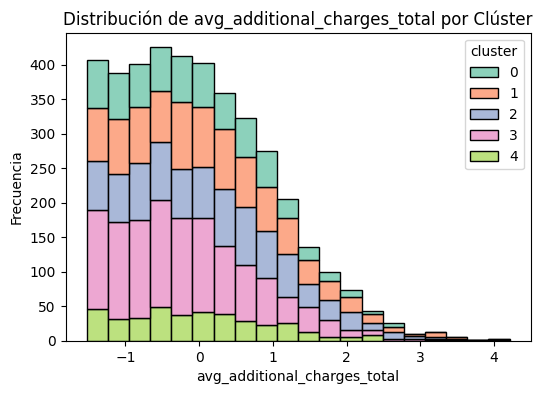

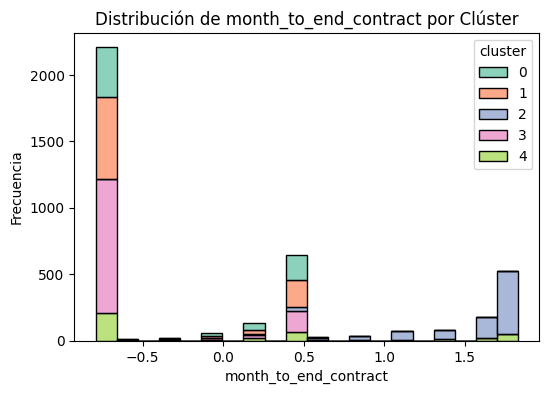

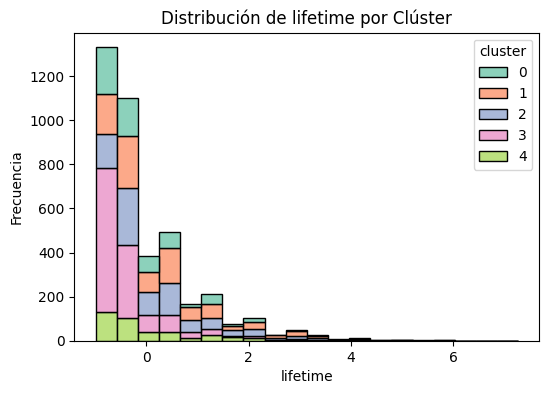

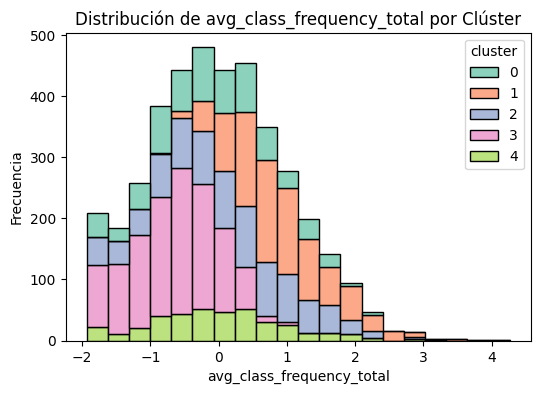

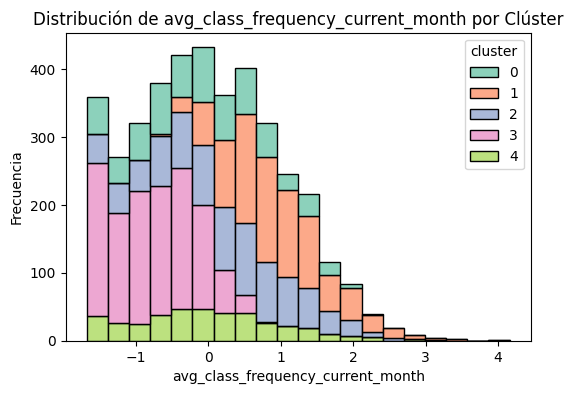

In [26]:
# Lista de columnas numéricas para graficar
numeric_cols = X_cluster.columns

# Distribuciones por clúster
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=churn_df, x=col, hue='cluster', multiple='stack', palette='Set2', bins=20)
    plt.title(f'Distribución de {col} por Clúster')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

In [27]:
# Tasa de churn por clúster
cluster_churn_rate = churn_df.groupby('cluster')['churn'].mean()
print("Tasa de cancelación por clúster:")
display(cluster_churn_rate)

Tasa de cancelación por clúster:


cluster
0    0.246445
1    0.089989
2    0.021965
3    0.572942
4    0.266839
Name: churn, dtype: float64

6. CONCLUSIONES 

Análisis de clústeres y tasa de cancelación

Clúster 0 – Tasa de cancelación: 24.6%
Clientes con niveles promedio de asistencia y duración de contrato; presentan un riesgo de cancelación medio.

Clúster 1 – Tasa de cancelación: 9.0%
Clientes leales, con contratos cortos y asistencia regular; el riesgo de cancelación es bajo.

Clúster 2 – Tasa de cancelación: 2.2%
Clientes altamente leales, con contratos largos, participación activa y alta asistencia; riesgo mínimo de cancelación.

Clúster 3 – Tasa de cancelación: 57.3%
Clientes de alto riesgo, con asistencia muy baja y escasa participación en clases grupales; riesgo de cancelación elevado.

Clúster 4 – Tasa de cancelación: 26.7%
Clientes de perfil medio a medio-bajo, con gastos adicionales reducidos; riesgo de cancelación medio-alto.

Conclusiones generales

La frecuencia de asistencia y la duración del contrato son los indicadores más sólidos del riesgo de cancelación.

Factores demográficos como la edad, proximidad al gimnasio y la participación en promociones tienen una influencia moderada en la retención.

El modelo de Bosque Aleatorio predice con alta precisión qué clientes podrían cancelar el próximo mes, facilitando acciones preventivas y decisiones estratégicas.

La segmentación por clústeres permite diseñar estrategias de marketing personalizadas, combinando hábitos de uso con el nivel de riesgo de cancelación.

Recomendaciones para la retención de clientes
1. Intervención temprana (Clúster 3 – Alto riesgo)

Ofrecer descuentos personalizados según hábitos y necesidades.

Promover planes de renovación con incentivos económicos.

2. Programas de fidelización (Clústeres 1 y 2 – Clientes leales)

Implementar tarjetas de lealtad o programas de recompensas por asistencia y uso de servicios adicionales.

Ofrecer acceso exclusivo a clases grupales o especiales.

Establecer beneficios por referir nuevos clientes.

3. Monitoreo constante (Clústeres 0 y 4 – Riesgo medio)

Enviar recordatorios de asistencia y pagos.

Recomendar clases o servicios personalizados según patrones de uso.

Implementar pequeñas promociones para incentivar la participación.

4. Mantenimiento del modelo predictivo

Actualizar los datos mensualmente para reflejar cambios en el comportamiento de los clientes.

Incorporar nuevas variables relevantes que puedan mejorar la precisión del modelo.